In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
df = pd.read_csv("/Users/ZINA/Desktop/amz_uk_price_prediction_dataset.csv")

In [2]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [ ]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories
# Crosstab Analysis:
# Create a crosstab between the product category and the isBestSeller status.
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])
crosstab_result
# Example of an interpretation: in category 3D Printers: there are 247 non best sellers and 1 best seller

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [4]:
# Are there categories where being a best-seller is more prevalent?
df.groupby('category')['isBestSeller'].sum().sort_values(ascending=False)

category
Grocery                        556
Health & Personal Care         552
Baby                           341
Sports & Outdoors              330
Power & Hand Tools             306
                              ... 
Blank Media Cases & Wallets      0
Boating Footwear                 0
Boxes & Organisers               0
CD, Disc & Tape Players          0
eBook Readers & Accessories      0
Name: isBestSeller, Length: 296, dtype: int64

In [ ]:
# Statistical Tests:
# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
from scipy.stats import chi2_contingency
chi2_statistic, chi2_p_value, _, expected_freq = chi2_contingency(crosstab_result)
chi2_statistic, chi2_p_value, expected_freq
# Question: Is best seller status independent of product category?
# Null hypothesis H0 : product category and best-seller status are independent
# Alternative hypothesis H1: product category and best-seller status are associated 
# p-value<0.05: we reject H0; this implies that there is a significant association between product category and best-seller status

(np.float64(36540.20270061387),
 np.float64(0.0),
 array([[2.47190130e+02, 8.09870149e-01],
        [4.05371878e+03, 1.32812173e+01],
        [2.49183599e+02, 8.16401360e-01],
        [1.69145827e+03, 5.54173243e+00],
        [2.53170536e+02, 8.29463782e-01],
        [8.50214439e+03, 2.78556144e+01],
        [1.06650580e+02, 3.49419782e-01],
        [2.57157474e+02, 8.42526204e-01],
        [9.51781673e+03, 3.11832664e+01],
        [1.50008526e+04, 4.91473619e+01],
        [9.32544700e+03, 3.05530045e+01],
        [2.38219520e+02, 7.80479700e-01],
        [3.22941944e+03, 1.05805616e+01],
        [9.44704859e+03, 3.09514084e+01],
        [6.68808779e+03, 2.19122125e+01],
        [5.26275760e+02, 1.72423967e+00],
        [1.90296531e+04, 6.23469391e+01],
        [2.77191835e+03, 9.08164873e+00],
        [2.53170536e+02, 8.29463782e-01],
        [4.04674164e+02, 1.32583581e+00],
        [1.92489346e+04, 6.30653723e+01],
        [3.10482764e+03, 1.01723609e+01],
        [2.04330551e+02, 6

In [ ]:
# Compute Cramér's V to understand the strength of association between best-seller status and category.
from scipy.stats.contingency import association
association(crosstab_result, method="cramer")
#  Cramér's V = 0.122 : weak association between product category and best-seller status

0.1222829439760564

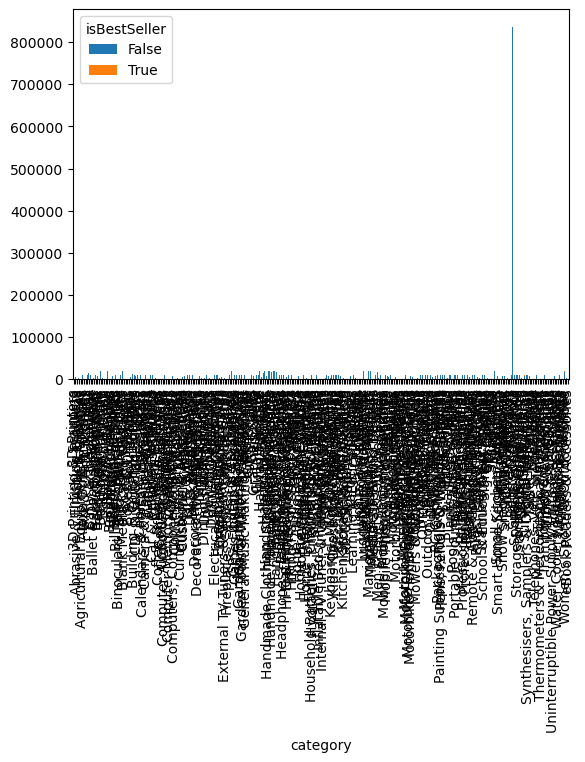

In [7]:
# Visualizations:
# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
crosstab_result.plot(kind="bar", stacked=True);

In [ ]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Preliminary Step: Remove outliers in product prices.
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # define whiskers for outliers 
    lower_wisker = Q1 - 1.5 * IQR 
    upper_wisker = Q3 + 1.5 * IQR 

    return lower_wisker, upper_wisker 

# Remove outliers: 
lower_wisker, upper_wisker = tukeys_test_outliers(df["price"])

df_no_outliers = df[(df["price"] >= lower_wisker) & (df["price"] <= upper_wisker)]

C:\Users\ZINA\AppData\Local\Temp\ipykernel_17180\1026125918.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20,x="category",y="price",palette="coolwarm")


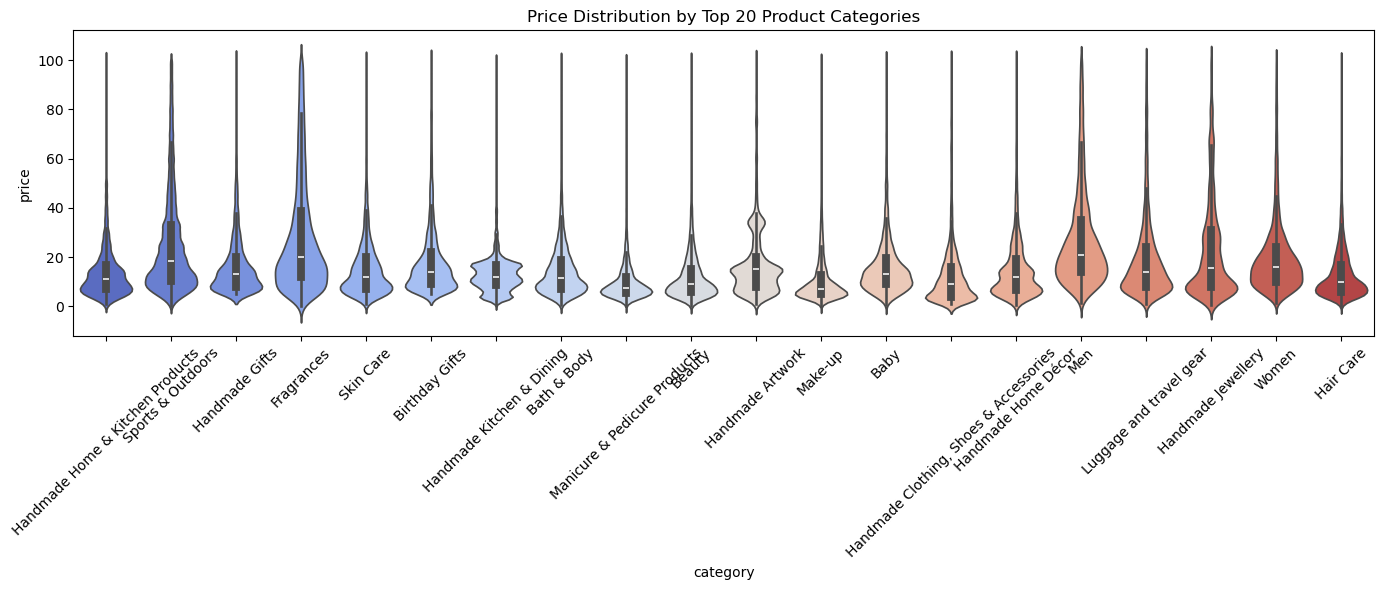

In [9]:
# 1. Violin Plots:
# Use a violin plot to visualize the distribution of price across different product categories. 
# Filter out the top 20 categories based on count for better visualization.

top_20_categories = (df_no_outliers["category"].value_counts().head(20).index)
df_top_20 = df_no_outliers[df_no_outliers["category"].isin(top_20_categories)]


plt.figure(figsize=(14, 6))

sns.violinplot(data=df_top_20,x="category",y="price",palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Price Distribution by Top 20 Product Categories")
plt.tight_layout()
plt.show()

In [ ]:
# Which product category tends to have the highest median price? Don't filter here by top categories.
df_no_outliers.groupby("category")["price"].median().sort_values(ascending=False)

# Answer: category with the highest median price is: Desktop PCs  

category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

C:\Users\ZINA\AppData\Local\Temp\ipykernel_17180\1544263189.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_10,x="category",y="price",estimator="mean",palette="coolwarm")


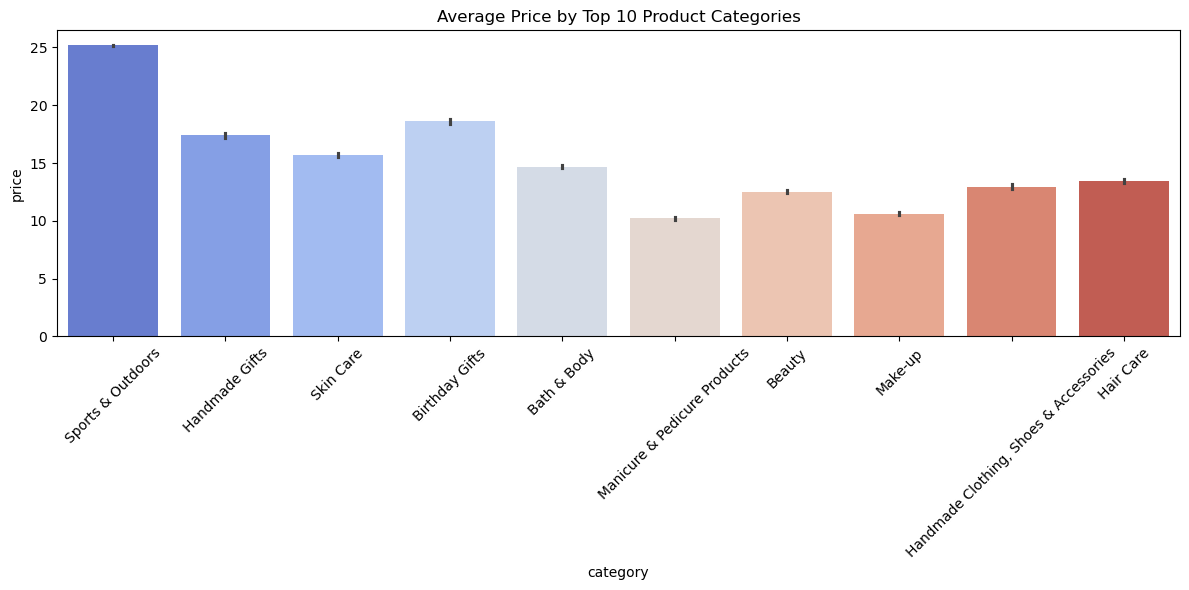

In [25]:
# 2. Bar Charts:
# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
# Get top 10 categories by count
top_10_categories = df_no_outliers["category"].value_counts().head(10).index
# Filter the data
df_top_10 = df_no_outliers[df_no_outliers["category"].isin(top_10_categories)]

# Create the bar chart (average price)
plt.figure(figsize=(12, 6))

sns.barplot(data=df_top_10,x="category",y="price",estimator="mean",palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Average Price by Top 10 Product Categories")
plt.tight_layout()
plt.show()


In [26]:
# Which product category commands the highest average price? Don't filter here by top categories.
df_no_outliers.groupby("category")["price"].mean().sort_values(ascending=False)

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

C:\Users\ZINA\AppData\Local\Temp\ipykernel_17180\4204937786.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_top_10,x="category",y="stars",palette="coolwarm")


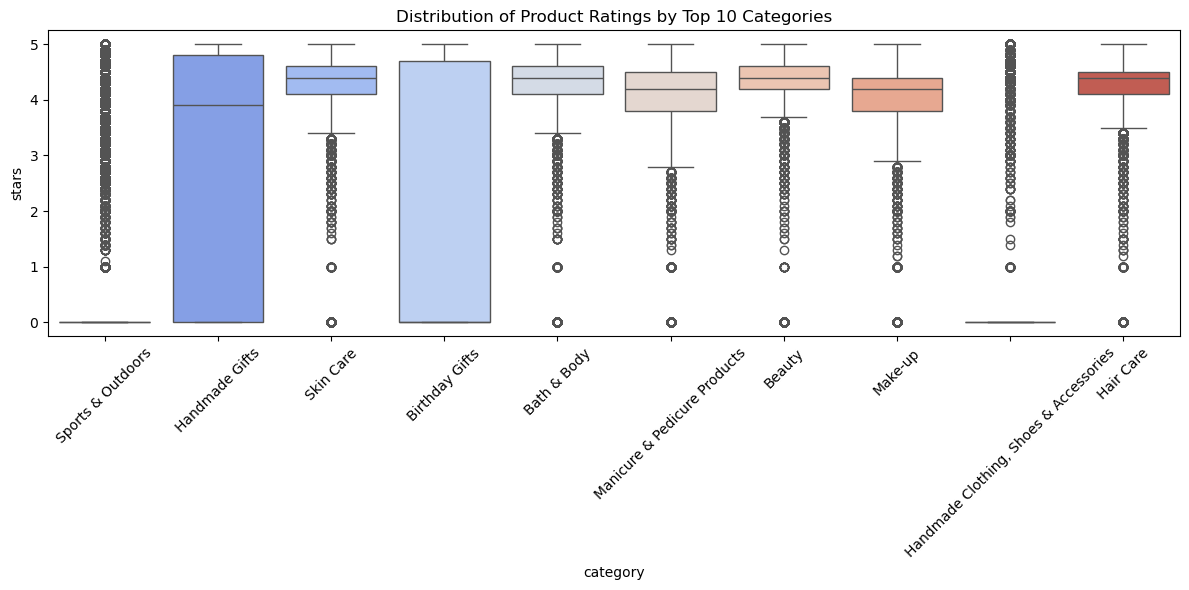

In [27]:
# 3. Box Plots: 
# Visualize the distribution of product ratings based on their category using side-by-side box plots. 
# Filter out the top 10 categories based on count for better visualization.
top_10_categories = df_no_outliers["category"].value_counts().head(10).index
df_top_10 = df_no_outliers[df_no_outliers["category"].isin(top_10_categories)]

plt.figure(figsize=(12, 6))

sns.boxplot(data=df_top_10,x="category",y="stars",palette="coolwarm")

plt.xticks(rotation=45)
plt.title("Distribution of Product Ratings by Top 10 Categories")
plt.tight_layout()
plt.show()

In [ ]:
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
df_no_outliers.groupby("category")["stars"].median().sort_values(ascending=False)
# The product category with the highest median rating is: Computer Memory

category
Computer Memory                                 4.7
Beer, Wine & Spirits                            4.6
Building & Construction Toys                    4.6
Office Paper Products                           4.6
Kids' Play Figures                              4.6
                                               ... 
Synthesisers, Samplers & Digital Instruments    0.0
Tablets                                         0.0
Action Cameras                                  0.0
3D Printing & Scanning                          0.0
eBook Readers & Accessories                     0.0
Name: stars, Length: 296, dtype: float64

In [18]:
# Part 3: Investigating the Interplay Between Product Prices and Ratings
# 1. Correlation Coefficients:
# Calculate the correlation coefficient between price and stars.
correlation = df['price'].corr(df['stars'])
correlation

np.float64(-0.12490673262159059)

In [ ]:
# Is there a significant correlation between product price and its rating?
# Pearson correlation =  -0.1249
# Weak negative correlation, higher-priced products tend to have slightly lower ratings (the effect is small)

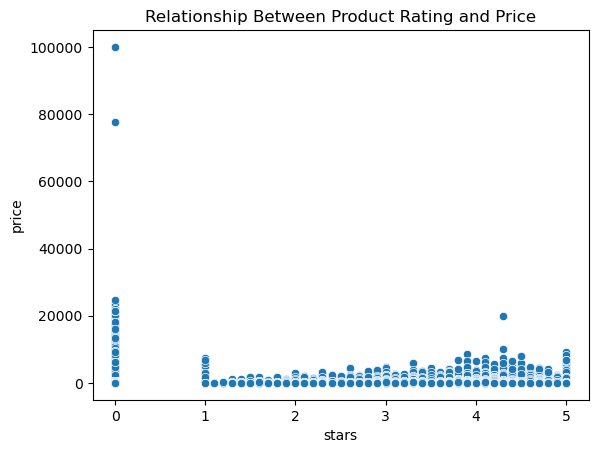

In [29]:
# 2. Visualizations:
# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
sns.scatterplot(data=df, x='stars', y='price')
plt.title("Relationship Between Product Rating and Price")
plt.show()

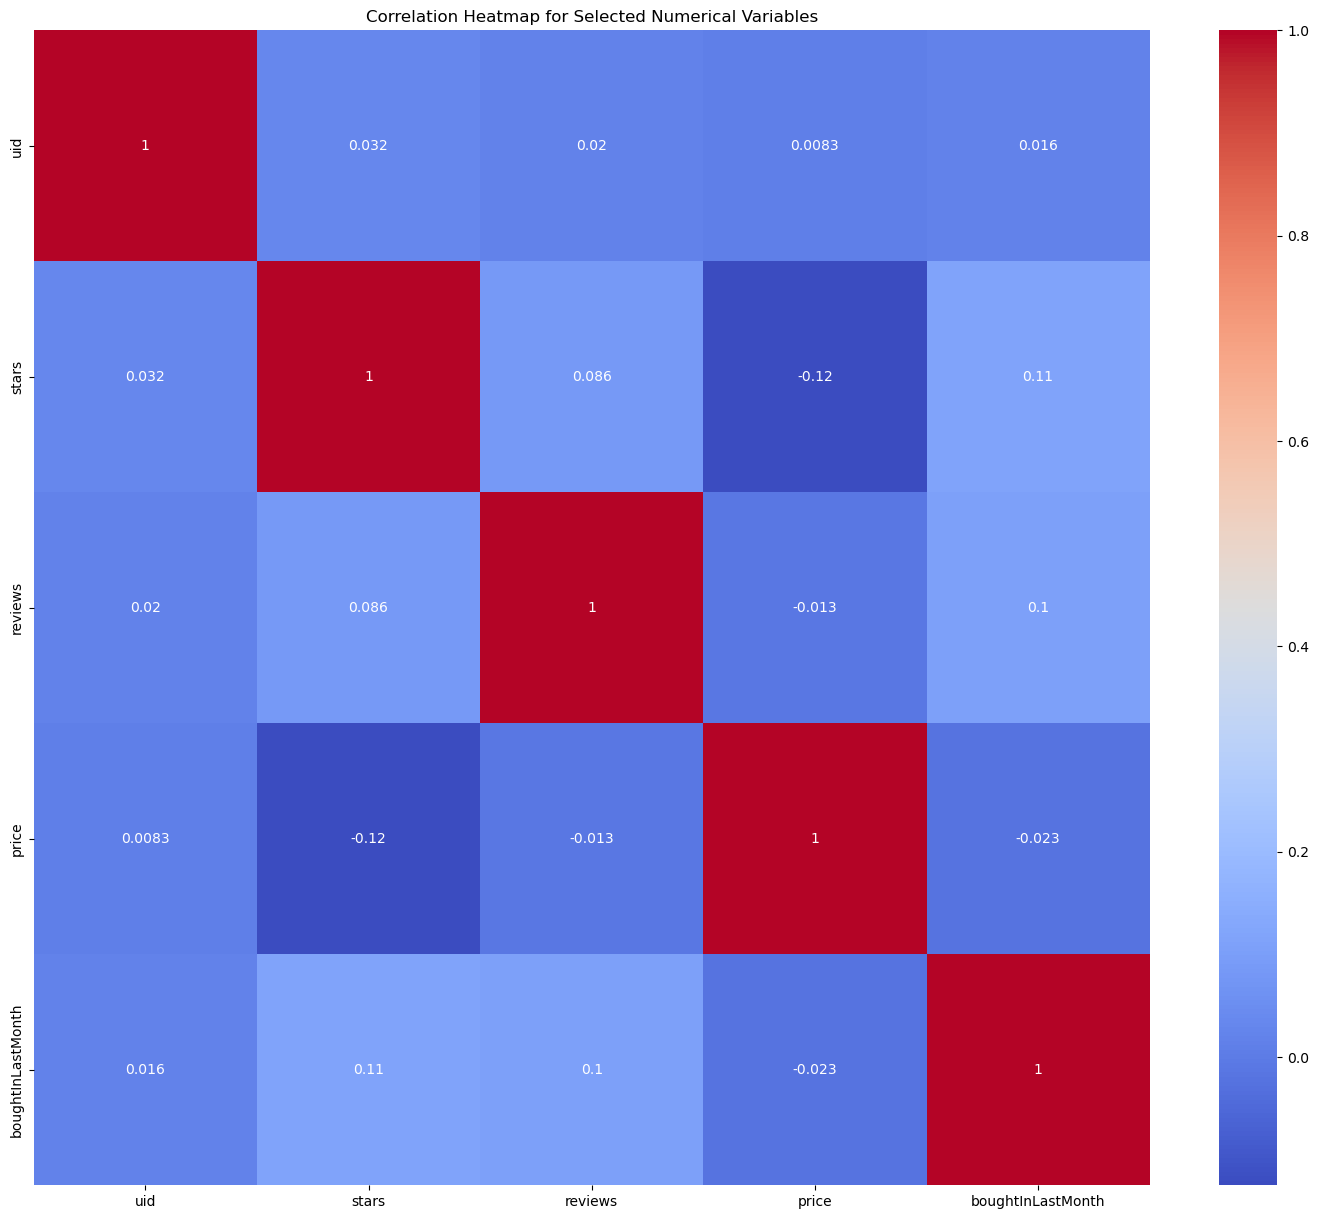

In [30]:
# Use a correlation heatmap to visualize correlations between all numerical variables.
potential_categorical_from_numerical = df.select_dtypes("number")

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

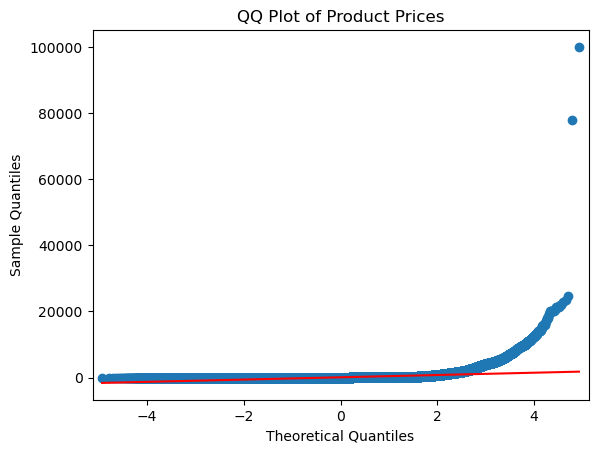

In [31]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm
sm.qqplot(df['price'], line='s')
plt.title("QQ Plot of Product Prices")
plt.show()